In [50]:
# train, test split
# split 후에도 원본데이터와 데이터의 비율이 같을까?
# 비율 그대로 뽑아내는 것

# 원본데이터의 특징을 가져오도록 구성해야 함

# train이 더 어려우면 좋은 거 아닌가...?

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 실습용 데이터 설정

- pandas DataFrame
  - iris.csv

In [53]:
DF = sns.load_dataset('iris')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
DF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
DF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1) 분석변수 선택
- X: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
- y: 'species'

In [56]:
X = DF[['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']]
y = DF['species']

### 2) Train & Test Split(width stratify)
- 7:3

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (105, 4) (105,)
Test Data:  (45, 4) (45,)


In [58]:
DF['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [59]:
print(y_train.value_counts(), '\n\n', y_test.value_counts())

# stratify를 하지 않고 분류된 비율을 보면
# 문제가 쉬워졌음을 알 수 있다. 왜?
# 분류하기 쉬운 setosa가 많다

# 여러가지 옵션을 통해 조정가능
# stratify(층화추출): 여러개의 층에서 뽑아낸다

setosa        35
virginica     35
versicolor    35
Name: species, dtype: int64 

 setosa        15
virginica     15
versicolor    15
Name: species, dtype: int64


## 1. Logistic Regression

### 1) 모델 생성
- C: Regularization strength
  - default: 1.0
  - 값이 작아지면 weight값을 0에 가깝게 학습
    - 다수의 데이터포인트에 맞추려는 경향
  - 값이 커지면 weight값을 제한하지 않음
    - 각각의 데이터포인트에 맞추려는 경향

In [60]:
LR = LogisticRegression(C = 0.3,                        # 학습률(알파와 비슷)
                        penalty = 'l2',
                        multi_class = 'multinomial',    # logistic으로 다중분류를 하고싶다면 multinomial
                        n_jobs = -1)

LR.fit(X_train, y_train)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 2) 모델 평가

In [61]:
print(accuracy_score(y_test, LR.predict(X_test)), '\n')
print(confusion_matrix(y_test, LR.predict(X_test)))

0.9333333333333333 

[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


## 2. Decision Tree Classifier

### 1) 모델 생성

In [62]:
%%time

DT = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 3,
                            random_state = 2045)

DT.fit(X_train, y_train)

CPU times: user 2.76 ms, sys: 0 ns, total: 2.76 ms
Wall time: 2.82 ms


### 2) 모델 평가

In [63]:
print(accuracy_score(y_test, DT.predict(X_test)), '\n')
print(confusion_matrix(y_test, DT.predict(X_test)))

0.8888888888888888 

[[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]


### 3) Feature Importance

In [64]:
DT.feature_importances_

array([0.        , 0.        , 0.64899406, 0.35100594])

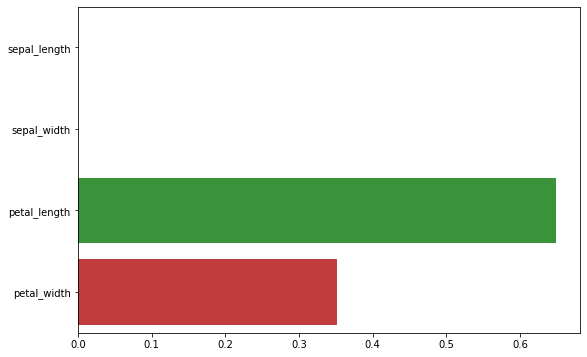

In [65]:
plt.figure(figsize = (9, 6))
sns.barplot(DT.feature_importances_,
            ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'])
plt.show()

## 3. Random Forest Classifier

### 1) 모델생성

In [66]:
%%time

RF = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = 100,
                            max_features = 3,
                            max_depth = 2,
                            random_state = 2045,
                            n_jobs = -1)

RF.fit(X_train, y_train)

CPU times: user 205 ms, sys: 34 ms, total: 239 ms
Wall time: 254 ms


### 2) 모델 평가

In [67]:
print(accuracy_score(y_test, RF.predict(X_test)), '\n')
print(confusion_matrix(y_test, RF.predict(X_test)))

0.9333333333333333 

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


### 3) Feature Importance

In [68]:
RF.feature_importances_

array([2.17808494e-04, 0.00000000e+00, 3.95922779e-01, 6.03859413e-01])

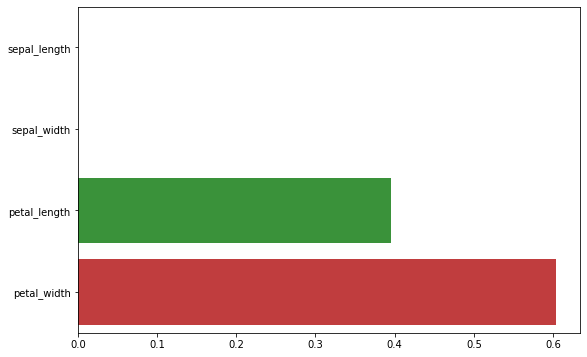

In [69]:
plt.figure(figsize = (9, 6))
sns.barplot(RF.feature_importances_,
            ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'])

plt.show()

## 4. Gradient Boosting Machine(GBM) Classifier

### 1) 모델 생성
- loss: 경사하강법에 사용될 오차함수
- learning_rate: 반복학습에 적용될 학습률
  - 너무 작으면 학습시간이 오래 걸릴 수 있음
  - 너무 크면 학습속도는 빠르지만 최적화되지 못할 수 있음
  - n_estimators와 함께 상호보완적으로 사용
- n_estimators: weak learner 개수
  - 약한 학습기들이 순차적으로 오차를 보정
  - 많을수록 학습시간이 길어짐

In [70]:
%%time

GBC = GradientBoostingClassifier(loss = 'deviance',
                                 n_estimators = 500,
                                 learning_rate = 0.01,
                                 max_features = 3,
                                 max_depth = 3)

GBC.fit(X_train, y_train)

CPU times: user 1.13 s, sys: 14.1 ms, total: 1.15 s
Wall time: 1.16 s


### 2) 모델 평가

In [71]:
print(accuracy_score(y_test, GBC.predict(X_test)), '\n')
print(confusion_matrix(y_test, GBC.predict(X_test)))

0.9333333333333333 

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


### 3) Feature Importance

In [72]:
GBC.feature_importances_

array([0.02911673, 0.08883488, 0.36647546, 0.51557293])

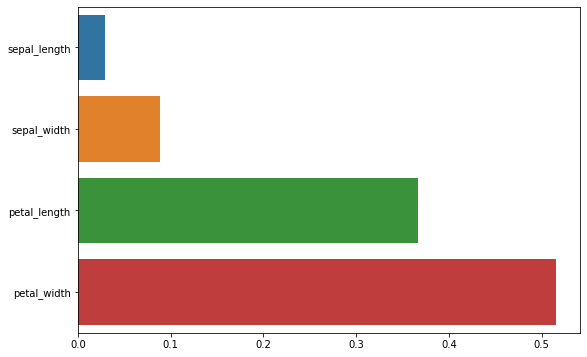

In [73]:
plt.figure(figsize = (9, 6))
sns.barplot(GBC.feature_importances_,
            ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'])
plt.show()

## 4. Adaptive Boosting Classifier

### 1) 모델 생성

In [74]:
%%time

ABC = AdaBoostClassifier(n_estimators = 1000,
                         learning_rate = 0.001,
                         random_state = 2045)

ABC.fit(X_train, y_train)

CPU times: user 1.46 s, sys: 11.3 ms, total: 1.47 s
Wall time: 1.47 s


### 2) 모델 평가

In [75]:
print(accuracy_score(y_test, ABC.predict(X_test)), '\n')
print(confusion_matrix(y_test, ABC.predict(X_test)))

0.8888888888888888 

[[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]


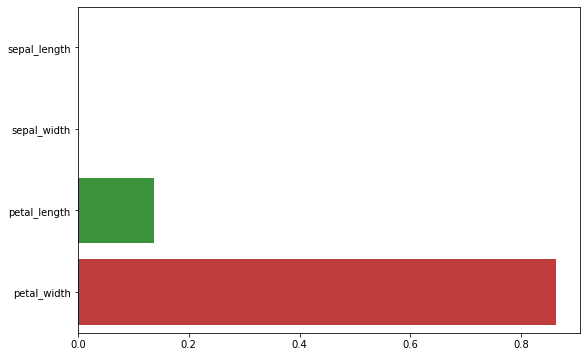

In [76]:
plt.figure(figsize = (9, 6))
sns.barplot(ABC.feature_importances_,
            ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'])
plt.show()

## 5. eXtra Gradient Boost(XGBoost) Classifier

### 1) 모델생성
- booster: 'gbtree' or 'gblinear'
- reg_lambda: L2 Regularization

In [77]:
%%time

XGB = XGBClassifier(booster = 'gbtree',
                    n_estimators = 500,
                    learning_rate = 0.5,
                    reg_lambda = 0.05,     # 오차함수를 보정할 때 규제화를 다시 해줌 (lambda: 알파값)
                    n_jobs = -1)

XGB.fit(X_train, y_train)

CPU times: user 117 ms, sys: 8.82 ms, total: 126 ms
Wall time: 68.9 ms


### 2) 모델 평가

In [78]:
print(accuracy_score(y_test, XGB.predict(X_test)), '\n')
print(confusion_matrix(y_test, XGB.predict(X_test)))

0.9111111111111111 

[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


### 3) Feature Importance

In [79]:
XGB.feature_importances_

array([0.00226077, 0.43800136, 0.12052245, 0.4392154 ], dtype=float32)

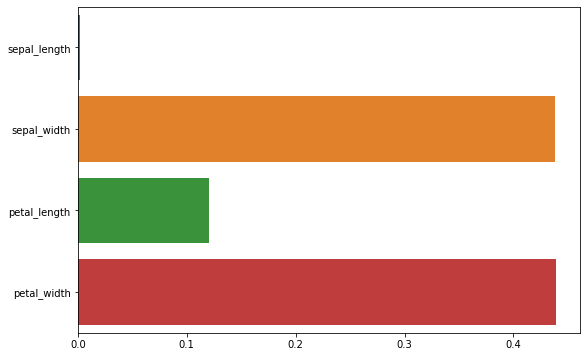

In [80]:
plt.figure(figsize = (9, 6))
sns.barplot(XGB.feature_importances_,
            ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'])
plt.show()

## 7. LightGBM Classifier

### 1) 모델 생성

In [81]:
%%time

LGB = LGBMClassifier(n_estimators = 500,
                     max_depth = 3,
                     learning_rate = 0.5,
                     reg_lambda = 0.2,
                     n_jobs = -1)

LGB.fit(X_train, y_train)

CPU times: user 178 ms, sys: 12.8 ms, total: 191 ms
Wall time: 106 ms


### 2) 모델 평가

In [82]:
print(accuracy_score(y_test, LGB.predict(X_test)), '\n')
print(confusion_matrix(y_test, LGB.predict(X_test)))

0.9555555555555556 

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


### 3) Feature Importance

In [83]:
LGB.feature_importances_

array([594, 704, 866, 847])

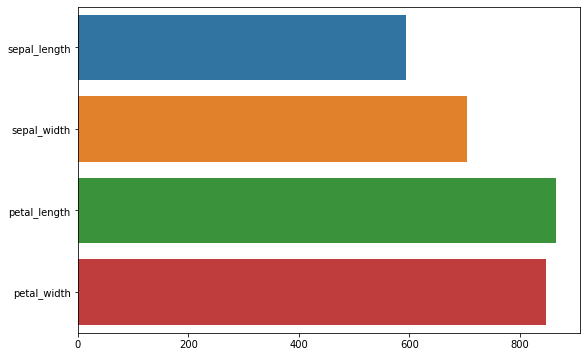

In [89]:
plt.figure(figsize = (9, 6))
sns.barplot(LGB.feature_importances_,
            ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width'])

plt.show()

## 8. K-Nearest Neighbors Classifier

### 1) 모델 생성

In [91]:
%%time

KNN = KNeighborsClassifier(n_neighbors = 5,
                           n_jobs = -1)

KNN.fit(X_train, y_train)

CPU times: user 1.99 ms, sys: 1.02 ms, total: 3.01 ms
Wall time: 6.47 ms


### 2) 모델 평가

In [92]:
print(accuracy_score(y_test, KNN.predict(X_test)), '\n')
print(confusion_matrix(y_test, KNN.predict(X_test)))

0.9777777777777777 

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
